# The Transformer Architecture: Attention is All You Need

What if we could process language the way we understand a painting - taking in all elements simultaneously rather than sequentially? This fundamental question led to the development of the Transformer architecture, a breakthrough that revolutionized how artificial intelligence processes sequential data.

## The Big Picture

Consider a Transformer as a black box for a moment. At its most basic level, it takes in a sequence of tokens (like words in a sentence) and produces another sequence of tokens. But unlike previous approaches that processed tokens one at a time like a human reading word by word, a Transformer processes all tokens simultaneously. This parallel processing ability is what makes Transformers both faster and more effective at understanding relationships between distant elements in a sequence.

```{note}
The shift from sequential to parallel processing in Transformers is analogous to how our visual system processes images. When you look at a picture, you don't scan it pixel by pixel. Instead, you take in the entire image at once and understand the relationships between different elements simultaneously.
```

```{figure} https://lansinuote.com/img/transformer.png
:name: transformer-overview
:alt: Transformer Overview
:width: 80%
:align: center

High-level overview of the Transformer architecture showing parallel processing capability
```

This parallel processing capability leads to two key advantages. First, it enables significant speedup through parallelization - we can process all relationships simultaneously on modern hardware. Second, it eliminates the "distance problem" - relationships between elements can be captured regardless of how far apart they are in the sequence, as every element has direct access to every other element.

Think of it like a group conversation versus a chain of whispers. In a chain of whispers (like RNNs), information might get distorted as it passes through many people. In a group conversation (like Transformers), everyone can hear and respond to everyone else directly, enabling richer, more accurate communication.

The price we pay for these advantages is increased memory usage - we need to store relationships between all pairs of elements. However, this tradeoff has proven worthwhile, as evidenced by the Transformer's widespread adoption in state-of-the-art language models.

```{tip}
When considering whether to use a Transformer for your task, the key question isn't just whether you're working with sequential data, but whether understanding relationships between distant elements is crucial for your task.
```

In the following sections, we'll zoom in progressively on how Transformers achieve this remarkable capability, starting with how they represent and process information, then examining their core components, and finally diving deep into the mechanisms that make it all work.

This introduction maintains a clear narrative flow while building concepts progressively, using concrete analogies to make abstract concepts more approachable. Would you like me to continue with the next section, or would you prefer to refine this section further?


# The Transformer Architecture: Attention is All You Need

The Transformer architecture revolutionized how AI processes text by enabling parallel processing of words. Unlike humans who read sequentially, Transformers can analyze an entire text simultaneously, understanding relationships between all words at once.

The key idea behind Transformers is to get rid of the sequential processing altogether for the sake of efficiency. Instead, it uses "attention" mechanisms to process all words simultaneously.
In transformers, the attention is called "self-attention", since the attention is paid within the same sentence, unlike the sequence-to-sequence models that pays attention from one sentence to another.

## Self-Attention

At its core, self-attention is about relationships. When you read the sentence "The cat sat on the mat because it was tired", how do you know what "it" refers to? You naturally look back at the previous words and determine that "it" refers to "the cat". Self-attention works similarly, but does this for every word in relation to every other word, simultaneously.

To compute the attention between words, transformers create three types of vectors---**query, key, and value**---for each word. Each of these vectors are created by a neural network (w/ single linear layer) that takes the input word as input, and outputs a vector of the same dimension as the input.

Think of this like a library system: The Query is what you're looking for, the Keys are like book titles, and the Values are the actual content of the books. When you search (Q) for a specific topic, you match it against book titles (K) to find the relevant content (V).

```{figure} https://cdn-images-1.medium.com/max/2000/1*moKYjUdtx-uEyYMbhPWbIw.png
:alt: Attention calculation
:width: 100%

Key, Query, and Value vectors
```

The vector of a word is then transformed into a new vector by the following formula:

$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

where $Q$ is the query vector, $K$ is the key vector, and $V$ is the value vector.

Let us break down the formula as follows:

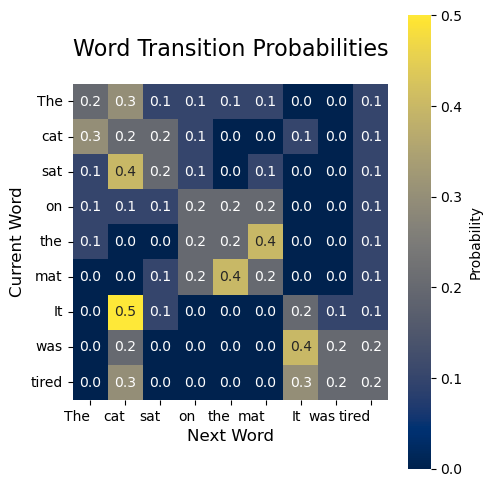

In [1]:
from myst_nb import glue
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the data
data = {
    'The': [0.2, 0.3, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0],
    'cat': [0.3, 0.2, 0.4, 0.1, 0.0, 0.0, 0.5, 0.2, 0.3],
    'sat': [0.1, 0.2, 0.2, 0.1, 0.0, 0.1, 0.1, 0.0, 0.0],
    'on': [0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0],
    'the': [0.1, 0.0, 0.0, 0.2, 0.2, 0.4, 0.0, 0.0, 0.0],
    'mat': [0.1, 0.0, 0.1, 0.2, 0.4, 0.2, 0.0, 0.0, 0.0],
    'It': [0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.3],
    'was': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.2],
    'tired': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2]
}

# Create DataFrame with proper index
df = pd.DataFrame(data,
                 index=['The', 'cat', 'sat', 'on', 'the', 'mat', 'It', 'was', 'tired'])

# Set up the matplotlib figure
fig = plt.figure(figsize=(5, 5))


# Create heatmap with seaborn
sns.heatmap(df,
            annot=True,  # Show numbers in cells
            fmt='.1f',   # Format numbers to 1 decimal place
            cmap='cividis',  # Yellow-Orange-Red color scheme
            square=True,    # Make cells square
            cbar_kws={'label': 'Probability'},
            vmin=0,         # Minimum value for color scaling
            vmax=0.5)       # Maximum value for color scaling

# Customize the plot
plt.title('Word Transition Probabilities', pad=20, size=16)
plt.xlabel('Next Word', size=12)
plt.ylabel('Current Word', size=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='right')
plt.yticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()
glue("cdf_fig", fig, display=False)

# Display the DataFrame with styling (for numerical comparison)
#df.style.background_gradient(cmap='YlOrRd', vmin=0, vmax=0.5)\
#    .format('{:.1f}')\
#    .set_caption('Word Transition Probabilities Table')

- **Attention matrix**: The vector product $QK^T$ is a matrix of size $n \times n$, where $n$ is the number of words in the sentence. This matrix is called *"attention matrix." Attention matrix shows how much attention each word pays to each other word. For example, given the sentence "The cat sat on the mat. It was tired.", the attention matrix (after applying the softmax function) is:


   ```{glue} cdf_fig
   ```

  A large value in the matrix means that transformer pays more attention to the word in the column as a relevant context to the row word. In this example, "It" and "tired" have high attention to "cat" (0.5, 0.3), meaning that "It" and "tired" are highly related to "cat".


- **Softmax function**: The softmax function is then applied to each row of the matrix, resulting in a matrix of size $n \times n$ where each element is the probability of the word being the next word in the sentence. The denominator $\sqrt{d_k}$ is a scaling factor that prevents the dot product from becoming too large, which can cause the softmax function to saturate and produce very small gradients.

  ```{note}
  The softmax function has a peculiar property: it is very sensitive to the scale of the input. If the input is too large, the softmax function will saturate and produce very small gradients. This is why we scale the dot product by $\sqrt{d_k}$.

  ```{figure} https://www.researchgate.net/publication/348703101/figure/fig5/AS:983057658040324@1611390618742/Graphic-representation-of-the-softmax-activation-function.ppm
  :alt: Softmax activation function
  :width: 50%
  :align: center

  Graphic representation of the softmax activation function.
  ```

- **Contextualized vector**: The final step in the attention mechanism involves the value vector $V$. After normalizing the attention matrix using softmax, we multiply it with $V$ to produce the output. This multiplication essentially computes a weighted average of the value vectors, where the weights come from the attention scores, i.e., $\text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)$. The result is the *contextualized vector* of the word in the row, where a word vector ($V$) is contextualized by other word vectors through the attention scores. Mathematically, for each word $i$, its contextualized vector is:

  $$c_i = \sum_{j=1}^n \alpha_{ij}v_j$$

  where $\alpha_{ij}$ is the $(i,j)$-th element of the attention matrix after softmax and $v_j$ is the $j$-th row of $V$. It is the weighted average since:

  $$\sum_{j=1}^n \alpha_{ij} = 1$$

  for all $i$, with larger weights being assigned to words that are more relevant to the word in the row.



### Multi-Head Attention: Multiple Perspectives
Why do we need multiple attention heads? Consider how you understand language. When reading a sentence, you simultaneously process multiple aspects: grammar, context, emotion, etc. Multi-head attention allows the model to do something similar. Each head can focus on different aspects of the relationships between words.

For example, in the sentence "The old man walked his dog", one attention head might focus on subject-verb relationships ("man-walked"), while another might capture possessive relationships ("man-dog").

### Position Matters: Encoding Sequential Information
One challenge with processing all words simultaneously is that word order gets lost. In the sentences "Dog bites man" and "Man bites dog", the words are identical, but the meaning is completely different! This is where positional encoding comes in.

Instead of learning word positions from scratch, Transformers use a clever mathematical formula using sine and cosine functions. These functions create unique patterns for each position, allowing the model to understand word order without sacrificing parallel processing.

### The Feed-Forward Networks: Individual Word Processing
After words have gathered information from their neighbors through attention, each word goes through its own feed-forward neural network. This is like giving each word a chance to "digest" all the information it has collected. The network is intentionally made wider in the middle (the `d_ff` parameter is typically 4 times larger than `d_model`) to allow for more complex processing.

### Layer Normalization: Keeping Things Stable
Training deep neural networks is like trying to balance a very tall tower – it can become unstable easily. Layer normalization helps stabilize this process by ensuring that the values flowing through the network don't become too large or too small. It's like having a thermostat that keeps the temperature (values) within a comfortable range.

### Putting It All Together
The beauty of Transformers lies in how these components work together:
1. Words are first embedded and position-encoded
2. Self-attention allows words to gather relevant information from each other
3. Multiple attention heads capture different types of relationships
4. Feed-forward networks process this gathered information
5. Layer normalization keeps everything stable
6. Residual connections ensure that no important information is lost

This architecture has proven so successful that it's now the foundation for models like BERT, GPT, and many others that have revolutionized natural language processing.

## From Sequential to Parallel Processing

Consider this challenge: How can we process a sequence without processing it... sequentially? Our previous models (RNNs, LSTMs) processed tokens one by one, maintaining a hidden state. But this sequential nature had two major drawbacks:

1. Limited parallelization: We had to wait for each step to complete before processing the next token
2. Difficulty capturing long-range dependencies: Even with LSTM's gating mechanisms, information could still get diluted over long sequences

```{note}
The Transformer architecture, introduced in the "Attention is All You Need" paper (Vaswani et al., 2017), was revolutionary because it showed that we can process sequences entirely through attention mechanisms, without any recurrence or convolution.
```

Let's build our intuition about how this works.

## Visual Overview

Before we dive into the implementation, let's visualize the key components:

```{figure} https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/Transformer-neural-network-11.png
:name: transformer-architecture
:alt: Transformer Architecture
:align: center

The Transformer architecture showing encoder and decoder components
```

## Self-Attention: The Key Innovation

Imagine you're reading a sentence and trying to understand the meaning of each word. Instead of processing words strictly in order, you look at all words simultaneously and figure out how they relate to each other. This is essentially what self-attention does!

### Mathematical Framework

For each position in the sequence, we compute three vectors:
- Query ($\mathbf{q}$): What information we're looking for
- Key ($\mathbf{k}$): What information this position offers
- Value ($\mathbf{v}$): The actual content at this position

These are computed using learned weight matrices:

$$\mathbf{q} = \mathbf{x}W^Q$$
$$\mathbf{k} = \mathbf{x}W^K$$
$$\mathbf{v} = \mathbf{x}W^V$$

The attention scores are then computed as:

$$\text{Attention}(\mathbf{Q}, \mathbf{K}, \mathbf{V}) = \text{softmax}\left(\frac{\mathbf{Q}\mathbf{K}^T}{\sqrt{d_k}}\right)\mathbf{V}$$

Let's implement this in Python:

In [2]:
import numpy as np
import torch
import torch.nn as nn

class SelfAttention(nn.Module):
    def __init__(self, d_model):
        super().__init__()
        # d_model is the dimension of our input/output vectors
        self.d_model = d_model

        # These linear layers transform our input into Q, K, V vectors
        # Input shape: (d_model) -> Output shape: (d_model)
        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)

    def forward(self, x):
        # x shape: (batch_size, seq_len, d_model)
        batch_size, seq_len, d_model = x.size()

        # Step 1: Create Q, K, V vectors
        q = self.q_linear(x)  # Shape: (batch_size, seq_len, d_model)
        k = self.k_linear(x)  # Shape: (batch_size, seq_len, d_model)
        v = self.v_linear(x)  # Shape: (batch_size, seq_len, d_model)

        # Step 2: Calculate attention scores
        # matmul(Q, K^T) -> Shape: (batch_size, seq_len, seq_len)
        scores = torch.matmul(q, k.transpose(-2, -1))

        # Scale the scores to prevent softmax saturation
        scores = scores / np.sqrt(d_model)

        # Step 3: Apply softmax to get attention weights
        attention = torch.softmax(scores, dim=-1)

        # Step 4: Multiply attention weights with values
        # Shape: (batch_size, seq_len, d_model)
        output = torch.matmul(attention, v)
        return output

```{tip}
When implementing self-attention, watch out for the scaling factor $\sqrt{d_k}$. Without it, the dot products can grow large in magnitude, pushing the softmax into regions with small gradients.
```

## Multi-Head Attention: Parallel Feature Learning

One key insight of Transformers is that a single attention mechanism might be too constraining. Why not let the model attend to different aspects of the sequence simultaneously?

This leads to Multi-Head Attention, where we run several attention mechanisms in parallel:

$$\text{MultiHead}(\mathbf{Q}, \mathbf{K}, \mathbf{V}) = \text{Concat}(\text{head}_1, ..., \text{head}_h)W^O$$

where each head is:

$$\text{head}_i = \text{Attention}(\mathbf{Q}W^Q_i, \mathbf{K}W^K_i, \mathbf{V}W^V_i)$$

Let's implement this:

In [3]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super().__init__()
        # Ensure d_model is divisible by num_heads
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        self.d_model = d_model
        self.num_heads = num_heads
        # Split d_model into num_heads pieces
        self.d_k = d_model // num_heads

        # Linear layers for Q, K, V, and output projections
        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.out_linear = nn.Linear(d_model, d_model)

    def forward(self, x):
        batch_size, seq_len, _ = x.size()

        # Step 1: Project input into Q, K, V vectors and split into heads
        # Original shape: (batch_size, seq_len, d_model)
        # After view: (batch_size, seq_len, num_heads, d_k)
        q = self.q_linear(x).view(batch_size, seq_len, self.num_heads, self.d_k)
        k = self.k_linear(x).view(batch_size, seq_len, self.num_heads, self.d_k)
        v = self.v_linear(x).view(batch_size, seq_len, self.num_heads, self.d_k)

        # Step 2: Transpose for attention computation
        # New shape: (batch_size, num_heads, seq_len, d_k)
        q = q.transpose(1, 2)
        k = k.transpose(1, 2)
        v = v.transpose(1, 2)

        # Step 3: Compute attention scores and apply attention
        scores = torch.matmul(q, k.transpose(-2, -1)) / np.sqrt(self.d_k)
        attention = torch.softmax(scores, dim=-1)
        output = torch.matmul(attention, v)

        # Step 4: Reshape and project back
        # Transpose back to (batch_size, seq_len, num_heads, d_k)
        output = output.transpose(1, 2)
        # Combine heads: (batch_size, seq_len, d_model)
        output = output.contiguous().view(batch_size, seq_len, self.d_model)
        return self.out_linear(output)

## Position-Aware Processing

One challenge with pure attention-based architectures is that they have no built-in sense of position - they're permutation invariant! The solution? Add position information directly to the input embeddings.

The original Transformer uses sinusoidal position encodings:

$$PE_{(pos,2i)} = \sin(pos/10000^{2i/d_{model}})$$
$$PE_{(pos,2i+1)} = \cos(pos/10000^{2i/d_{model}})$$

In [4]:
def positional_encoding(max_seq_len, d_model):
    pe = torch.zeros(max_seq_len, d_model)
    position = torch.arange(0, max_seq_len, dtype=torch.float).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))

    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    return pe

```{note}
The choice of sinusoidal functions is clever because it allows the model to easily attend to relative positions through linear combinations of these position encodings.
```

## Feed-Forward Networks and Layer Normalization

Between attention layers, Transformers use simple feed-forward networks with a special structure:

$$FFN(x) = \max(0, xW_1 + b_1)W_2 + b_2$$

This is implemented as two linear transformations with a ReLU activation in between:

In [5]:
class FeedForward(nn.Module):
    def __init__(self, d_model, d_ff):
        super().__init__()
        self.linear1 = nn.Linear(d_model, d_ff)
        self.linear2 = nn.Linear(d_ff, d_model)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.linear2(self.relu(self.linear1(x)))

To help training, Transformers use Layer Normalization before each sub-layer:

In [6]:
class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads, d_ff):
        super().__init__()
        self.attention = MultiHeadAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model)
        self.ff = FeedForward(d_model, d_ff)
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, x):
        # Attention with residual connection and layer norm
        x = x + self.attention(self.norm1(x))
        # Feed-forward with residual connection and layer norm
        x = x + self.ff(self.norm2(x))
        return x

## Reflection Questions

1. How does the parallel nature of Transformers affect their computational efficiency compared to RNNs?
2. Why might multiple attention heads be better than a single, larger attention mechanism?
3. How do the residual connections and layer normalization help with training deep Transformer networks?
4. What are the limitations of the Transformer architecture? When might traditional RNNs still be preferable?

```{tip}
When implementing Transformers, pay special attention to:
- Proper scaling in attention computation
- Correct reshaping for multi-head attention
- Adding positional encodings before the first layer
- Using residual connections around each sub-layer
```

## Exercises

1. **Basic Implementation Exercise**
   Implement a simplified version of self-attention that works with this input:
   ```python
   # Your code should handle:
   batch_size = 2
   seq_length = 4
   d_model = 8
   x = torch.randn(batch_size, seq_length, d_model)
   ```

2. **Visualization Exercise**
   Write code to visualize attention weights using a heatmap:
   ```python
   import seaborn as sns
   import matplotlib.pyplot as plt

   def plot_attention(attention_weights, words):
       # Your code here
       pass
   ```